In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets

import subkmeans

## Test on small synthetic dataset

In [ ]:
data = np.array([[1,1],[1.1,1.1],[0.9,0.9], [5,5],[5.2,4.9], [4.8,5.3]])

In [ ]:
X = preprocessing.scale(data)

In [ ]:
kmeans = subkmeans.SubKmeans(2, X)
comp = SubKMeans.SubKMeans(2)

In [ ]:
kmeans._find_cluster_assignment()
print(comp.get_projection_matrix(1,2))

In [ ]:
print(kmeans.m)
print(comp.m)

In [ ]:
kmeans.run()

In [ ]:
print(kmeans.assignments)

In [ ]:
print(kmeans.centroids)

In [ ]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')

## Testing on Wine

In [ ]:
wine = datasets.load_wine()
print(wine.data.shape)

In [ ]:
X = preprocessing.scale(wine.data)
kmeans = subkmeans.SubKmeans(3, X)

In [ ]:
kmeans.run()

In [ ]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
cluster3 = np.vstack(kmeans.assignments[2])
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,1], color='green')

### Project to cluster space

In [ ]:
c1 = (kmeans.pc.T @ kmeans.transform.T @ cluster1.T).T
c2 = (kmeans.pc.T @ kmeans.transform.T @ cluster2.T).T
c3 = (kmeans.pc.T @ kmeans.transform.T @ cluster3.T).T
other = (comp.pT @ comp.V @ comp.X.T).T

In [ ]:
plt.scatter(c1[:,0], c1[:,1], color='red')
plt.scatter(c2[:,0], c2[:,1], color='blue')
plt.scatter(c3[:,0], c3[:,1], color='green')

## Test on sample dataset provided by original authors

In [91]:
# dataset from authors
sample = np.genfromtxt('test/sample.dat', delimiter=';')

# result of running original scala code on dataset
sample_result = np.genfromtxt('test/sample_result.dat', delimiter=';')

In [92]:
X = preprocessing.scale(sample[:,1:6])
kmeans = subkmeans.SubKmeans(3, X)

In [93]:
kmeans.run()

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.9248187582109536
1000
0.9248187582109536
1000


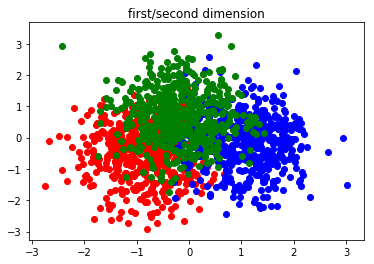

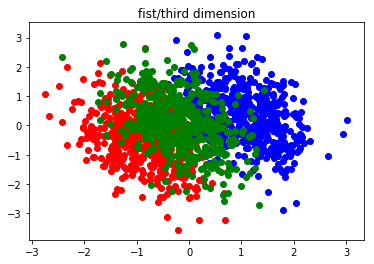

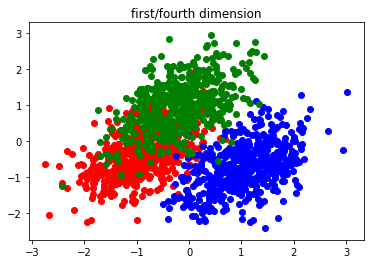

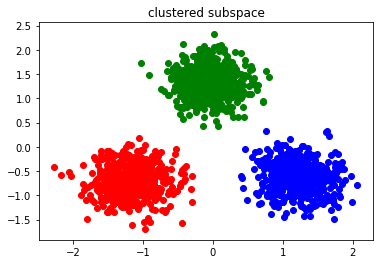

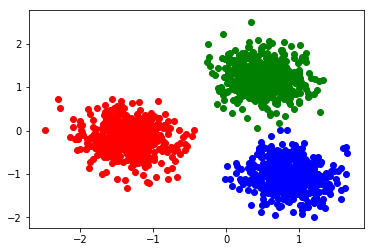

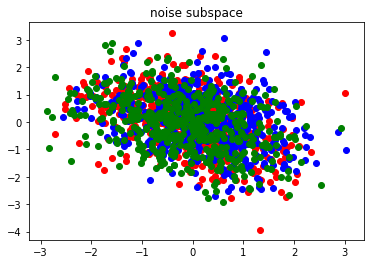

In [94]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
cluster3 = np.vstack(kmeans.assignments[2])

# cluster subspace projection
c1 = (kmeans.pc.T @ kmeans.transform.T @ cluster1.T).T
c2 = (kmeans.pc.T @ kmeans.transform.T @ cluster2.T).T
c3 = (kmeans.pc.T @ kmeans.transform.T @ cluster3.T).T

c11 = np.vstack(kmeans.cluster_space_assignments[0])
c22 = np.vstack(kmeans.cluster_space_assignments[1])
c33 = np.vstack(kmeans.cluster_space_assignments[2])

# XXX: the transformation matrix gets updated as the last step, so cx and cxx are not guaranteed to be the same unless the algorithm has truly converged and V isn't updated on the last iteration

# noise subspace projection
c1n = np.vstack(kmeans.noise_space_assignments[0])
c2n = np.vstack(kmeans.noise_space_assignments[1])
c3n = np.vstack(kmeans.noise_space_assignments[2])


plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,1], color='green')
plt.title('first/second dimension')
plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,2], color='red')
plt.scatter(cluster2[:,0], cluster2[:,2], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,2], color='green')
plt.title('fist/third dimension')
plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,3], color='red')
plt.scatter(cluster2[:,0], cluster2[:,3], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,3], color='green')
plt.title('first/fourth dimension')
plt.figure()
plt.scatter(c1[:,0], c1[:,1], color='red')
plt.scatter(c2[:,0], c2[:,1], color='blue')
plt.scatter(c3[:,0], c3[:,1], color='green')
plt.title('clustered subspace');
plt.figure()
plt.scatter(c11[:,0], c11[:,1], color='red')
plt.scatter(c22[:,0], c22[:,1], color='blue')
plt.scatter(c33[:,0], c33[:,1], color='green')
plt.figure()
plt.scatter(c1n[:,0], c1n[:,1], color='red')
plt.scatter(c2n[:,0], c2n[:,1], color='blue')
plt.scatter(c3n[:,0], c3n[:,1], color='green')
plt.title('noise subspace');

### Check our results against Scala results

False


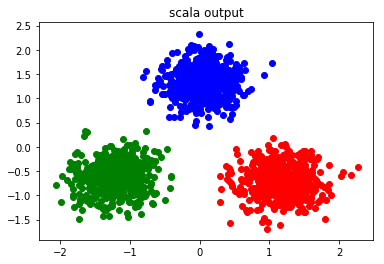

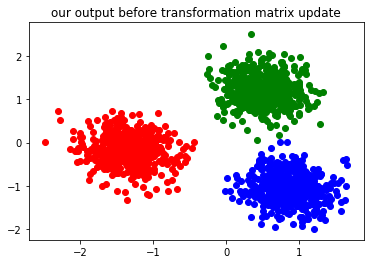

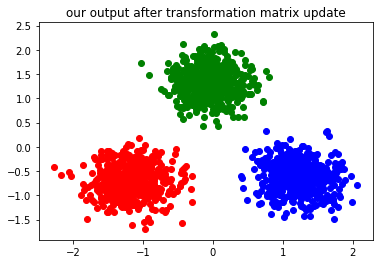

In [97]:
sample_c1 = sample_result[np.where(sample_result[:,0] == 0), 1:6][0,:]
sample_c2 = sample_result[np.where(sample_result[:,0] == 1), 1:6][0,:]
sample_c3 = sample_result[np.where(sample_result[:,0] == 2), 1:6][0,:]

is_same = np.array_equal(np.sort(sample_c1), np.sort(cluster1)) and \
np.array_equal(np.sort(sample_c2), np.sort(cluster2)) and \
np.array_equal(np.sort(sample_c3), np.sort(cluster3))
print(is_same)

plt.scatter(sample_c1[:,0], sample_c1[:,1], color='red')
plt.scatter(sample_c2[:,0], sample_c2[:,1], color='blue')
plt.scatter(sample_c3[:,0], sample_c3[:,1], color='green')
plt.title('scala output')
plt.figure()
plt.scatter(c11[:,0], c11[:,1], color='red')
plt.scatter(c22[:,0], c22[:,1], color='blue')
plt.scatter(c33[:,0], c33[:,1], color='green')
plt.title('our output before transformation matrix update')
plt.figure()
plt.scatter(c1[:,0], c1[:,1], color='red')
plt.scatter(c2[:,0], c2[:,1], color='blue')
plt.scatter(c3[:,0], c3[:,1], color='green')
plt.title('our output after transformation matrix update');

The differences between the scala output and our output are probably just from the algorithm only converging to local minima